<sup>This notebook is adapted from code from *Deep Learning with Python 2nd edition* by Francois Challot. 

<sup>See the original code in the books' companion [GitHub](https://github.com/fchollet/deep-learning-with-python-notebooks).  Find the book here: [Amazon Link](https://www.amazon.com/Learning-Python-Second-Fran-C3-A7ois-Chollet-dp-1617296864/dp/1617296864/)



## Classifying newswires: A multiclass classification example

Classifying a news article into one of 46 topics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

### The Reuters dataset

Again, load with 10K max words in the vocabulary. The data is already divided into train and test sets.

**Loading the Reuters dataset**

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


### Decoding newswires back to text

We can use the word index to reconstruct an article.

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

565248/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

### Preparing the data

### Encoding the input data

Encoding the same as the IMDB notebook.


In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Encoding the labels

The following code will convert the labels from an integer vector to one-hot encoded vectors, where all elements are 0 except for a 1 in the corresponding class position.

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

This is a harder problem, since we are classifying into one of 46 classes. We will need more layers, and more nodes in the early layers.

### Model definition

Two hidden layers with 46 nodes. A softmax output layer with 46 nodes.

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

### Compiling the model

Use categorical crossentropy for multi-class classification.

In [13]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Setting aside a validation set

10K observations for validation

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Train the model

20 epochs

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 2.5828 - accuracy: 0.5392 - val_loss: 1.6958 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.3868 - accuracy: 0.7052 - val_loss: 1.2928 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0360 - accuracy: 0.7771 - val_loss: 1.1459 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8250 - accuracy: 0.8269 - val_loss: 1.0379 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6561 - accuracy: 0.8622 - val_loss: 0.9749 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5279 - accuracy: 0.8929 - val_loss: 0.9416 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4277 - accuracy: 0.9126 - val_loss: 0.9357 - val_accuracy: 0.8090
Epoch 8/20
16

### Plotting the training and validation loss

The model begins to overfit after 9 epochs.

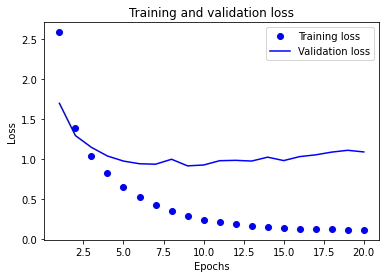

In [17]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation accuracy

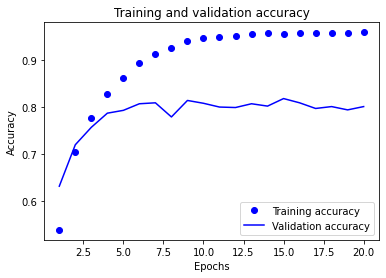

In [18]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Retraining a model from scratch

Use only 9 epochs to avoid overfitting.

In [19]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 38ms/step - loss: 2.5666 - accuracy: 0.5335
Epoch 2/9
18/18 [==============================] - 1s 39ms/step - loss: 1.3674 - accuracy: 0.7199
Epoch 3/9
18/18 [==============================] - 1s 38ms/step - loss: 1.0171 - accuracy: 0.7859
Epoch 4/9
18/18 [==============================] - 1s 38ms/step - loss: 0.8062 - accuracy: 0.8348
Epoch 5/9
18/18 [==============================] - 1s 37ms/step - loss: 0.6434 - accuracy: 0.8683
Epoch 6/9
18/18 [==============================] - 1s 37ms/step - loss: 0.5224 - accuracy: 0.8939
Epoch 7/9
18/18 [==============================] - 1s 38ms/step - loss: 0.4232 - accuracy: 0.9093
Epoch 8/9
18/18 [==============================] - 1s 39ms/step - loss: 0.3483 - accuracy: 0.9235
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9875 - accuracy: 0.7934


In [ ]:
# accuracy of nearly 80%

results

[0.9375891089439392, 0.7920747995376587]

Check for the results from a random classifier as a baseline: 19%, so 80% seems good.

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19412288512911843

### Generating predictions on new data

Each prediction is a vector of length 46, which should sum up to 1.

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

0.99999994

In [24]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

If we leave the labels as integers, we would need to use a different loss function.

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

### A model with an information bottleneck

Validation accuracy drops by about 8%

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.3552 - accuracy: 0.1319 - val_loss: 2.8968 - val_accuracy: 0.2900
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 2.4303 - accuracy: 0.3438 - val_loss: 2.0917 - val_accuracy: 0.6160
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 1.6064 - accuracy: 0.6486 - val_loss: 1.5323 - val_accuracy: 0.6400
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 1.2890 - accuracy: 0.6719 - val_loss: 1.4384 - val_accuracy: 0.6570
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.1727 - accuracy: 0.6918 - val_loss: 1.4119 - val_accuracy: 0.6630
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0924 - accuracy: 0.7036 - val_loss: 1.4182 - val_accuracy: 0.6690
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0297 - accuracy: 0.7093 - val_loss: 1.4196 - val_accuracy: 0.6750
Epoch 8/20
63

Things to try:

* using more or fewer layers and units